# Plotting data from from QCoDeS

In [14]:
%matplotlib inline
import qcodes as qc
import random
import os
import matplotlib.pyplot as plt
from qcodes.dataset.data_set import load_by_id
from qcodes.dataset.plotting import plot_dataset
from qcodes.utils.validators import Numbers, Arrays
from qcodes.instrument.base import Instrument
from qcodes.dataset.measurements import Measurement
from qcodes.instrument.parameter import ParameterWithSetpoints, Parameter
from qcodes.utils.dataset.doNd import do1d, do2d, plot
from qcodes import load_or_create_experiment, initialise_database, initialise_or_create_database_at
from IPython.display import Image

db_file_path = os.path.join(os.getcwd(), 'plotting_tutorial.db')
initialise_or_create_database_at(db_file_path)
exp = load_or_create_experiment(experiment_name='plotting',
                          sample_name="no sample")


### Dummy Instruments to generate data

In [3]:
class RandomParam(Parameter):
    def __init__(self, name, **kwargs):
        super().__init__(name, **kwargs)
    def get_raw(self):
        return random.random()

class DummyInstrument(Instrument):

    def __init__(self, name, **kwargs):

        super().__init__(name, **kwargs)
        
        self.add_parameter('Bias', unit='V', parameter_class=RandomParam)
        
        self.add_parameter('Magnetic_field',
                           initial_value=0,
                           unit='T',
                           label='Parallel magnetic field',
                           vals=Numbers(0,10),
                           get_cmd=None,
                           set_cmd=None)
        
        self.add_parameter('V',
                           initial_value=0,
                           unit='V',
                           label='V_gate',
                           vals=Numbers(0,10),
                           get_cmd=None,
                           set_cmd=None)
        
class NonSIInstrument(Instrument):

    def __init__(self, name, **kwargs):

        super().__init__(name, **kwargs)
        
        self.add_parameter('Bias', unit='NonSI', parameter_class=RandomParam)
        
        self.add_parameter('Magnetic_field',
                           initial_value=0,
                           unit='B',
                           label='Parallel magnetic field',
                           vals=Numbers(0,10),
                           get_cmd=None,
                           set_cmd=None)
        
        self.add_parameter('V',
                           initial_value=0,
                           unit='Volt',
                           label='V_gate',
                           vals=Numbers(0,10),
                           get_cmd=None,
                           set_cmd=None)
                  

In [4]:
test = DummyInstrument('test')
NoneSI = NonSIInstrument('NoneSI')

### Plotting using do2d

When you use a doND the axis are automaticly scaled  

Starting experimental run with id: 1. 


(results #1@C:\Users\rbcma\CodeSnips\plotting_tutorial.db
 --------------------------------------------------------
 test_V - numeric
 test_Magnetic_field - numeric
 test_Bias - numeric,
 [<AxesSubplot:title={'center':'Run #1, Experiment plotting (no sample)'}, xlabel='V_gate (V)', ylabel='Parallel magnetic field (mT)'>],
 [<matplotlib.colorbar.Colorbar at 0x179fa572548>])

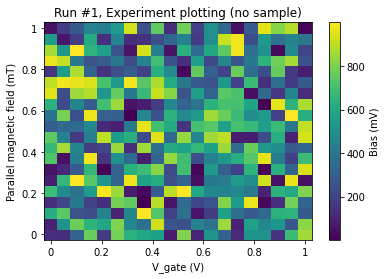

In [5]:
do2d(test.V, 0, 1, 20, 0.01, test.Magnetic_field, 0, 0.001, 20, 0.01,test.Bias, do_plot = True)

Starting experimental run with id: 2. 


(results #2@C:\Users\rbcma\CodeSnips\plotting_tutorial.db
 --------------------------------------------------------
 test_V - numeric
 test_Magnetic_field - numeric
 test_Bias - numeric,
 [<AxesSubplot:title={'center':'Run #2, Experiment plotting (no sample)'}, xlabel='V_gate (mV)', ylabel='Parallel magnetic field (μT)'>],
 [<matplotlib.colorbar.Colorbar at 0x179fb4e08c8>])

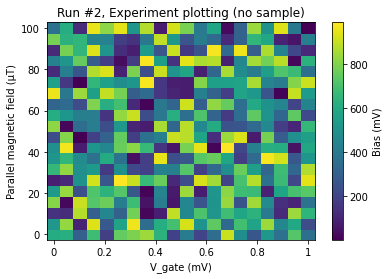

In [7]:
do2d(test.V, 0, 0.001, 20, 0.01, test.Magnetic_field, 0, 0.0001, 20, 0.01,test.Bias, do_plot = True)

### Label
If you do not like the Label defined by the driver you can override it before you make the measurement. 

Starting experimental run with id: 4. 


(results #4@C:\Users\rbcma\CodeSnips\plotting_tutorial.db
 --------------------------------------------------------
 test_V - numeric
 test_Magnetic_field - numeric
 test_Bias - numeric,
 [<AxesSubplot:title={'center':'Run #4, Experiment plotting (no sample)'}, xlabel='New Label (mV)', ylabel='Parallel magnetic field (μT)'>],
 [<matplotlib.colorbar.Colorbar at 0x179fb6bcd08>])

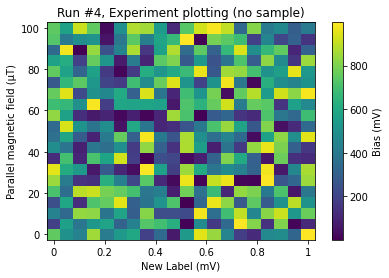

In [9]:
test.V.label  = 'New Label'
do2d(test.V, 0, 0.001, 20, 0.01, test.Magnetic_field, 0, 0.0001, 20, 0.01,test.Bias, do_plot = True)

If non SI units are used the axis are still scaled. However not so nicely.

Starting experimental run with id: 8. 


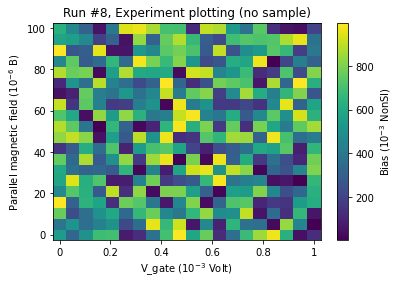

In [98]:
data_ax = do2d(NoneSI.V, 0, 0.001, 20, 0.01, NoneSI.Magnetic_field, 0, 0.0001, 20, 0.01,NoneSI.Bias, do_plot = True)

### Matplotlib
The plotting in QCoDeS is just a wrapper around Matplotlib, so you can always change things afterwards.
https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py

In [100]:
ax = data_ax[1][0]
ax.set_xlabel('V gate (mV)')
ax.set_ylabel(r'B|| ($\mu$T)')
ax.set_title('Random Plot')

ax.figure.savefig("mygraph.png")

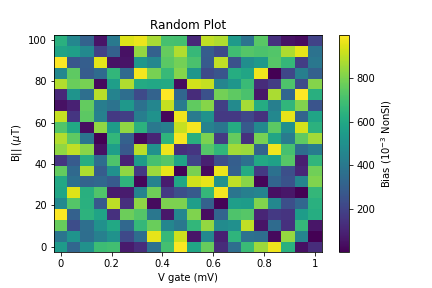

In [101]:
Image(filename='mygraph.png') 

### Loading and plotting the data 
Using QCoDeS plot_dataset works the same way.

In [107]:
my_data = load_by_id(1)

([<AxesSubplot:title={'center':'Run #1, Experiment plotting (no sample)'}, xlabel='V_gate (V)', ylabel='Parallel magnetic field (T)'>],
 [<matplotlib.colorbar.Colorbar at 0x179995f3388>])

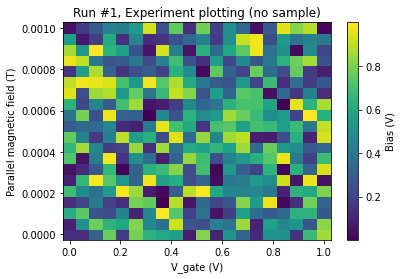

In [108]:
plot_dataset(my_data ,rescale_axes = False)


In [109]:
plot_dataset(my_data , axes=ax, rescale_axes = True)

([<AxesSubplot:title={'center':'Run #1, Experiment plotting (no sample)'}, xlabel='V_gate (V)', ylabel='Parallel magnetic field (mT)'>],
 [<matplotlib.colorbar.Colorbar at 0x179965a0888>])

Text(0.5, 1.0, 'Random Title')

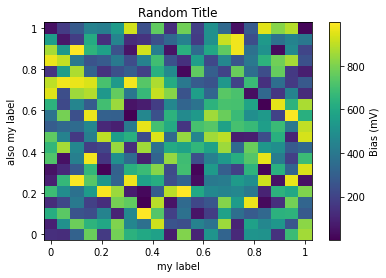

In [110]:
fig, ax = plt.subplots(1,1)
my_plot = plot_dataset(a , axes=ax, rescale_axes = True)
ax.set_xlabel('my label')
ax.set_ylabel('also my label')
ax.set_title('Random Title')


### Xarray
If you need to apply a transformation to the data, you can use xarray. The plotting in xarray is also just a wrapper around matplotlib. 

In [115]:
x_data = my_data.to_xarray_dataset()

In [116]:
x_data

<xarray.Dataset>
Dimensions:              (test_Magnetic_field: 20, test_V: 20)
Coordinates:
  * test_V               (test_V) float64 0.0 0.05263 0.1053 ... 0.9474 1.0
  * test_Magnetic_field  (test_Magnetic_field) float64 0.0 5.263e-05 ... 0.001
Data variables:
    test_Bias            (test_V, test_Magnetic_field) float64 0.1351 ... 0.0...
Attributes:
    sample_name:  no sample
    exp_name:     plotting

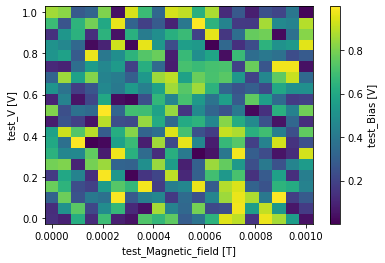

In [117]:
fig, ax = plt.subplots(1,1)
x_data.test_Bias.plot(ax=ax)


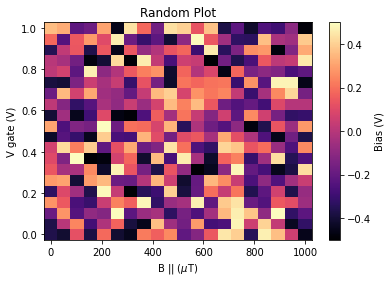

In [118]:
x_data2 = x_data.assign_coords( test_Magnetic_field=x_data.test_Magnetic_field*1e6)
x_data2.test_Bias.values = x_data2.test_Bias.values - 0.5
fig, ax = plt.subplots(1,1)
my_plot = x_data2.test_Bias.plot(ax=ax)
ax.set_ylabel('V gate (V)')
ax.set_xlabel(r'B || ($\mu$T)')
ax.set_title('Random Plot')
my_plot.set_cmap('magma')
my_plot.colorbar.set_label('Bias (V)')